In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/tokud/Projects/Insurance Linear Regression/transactions.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(100000, 5)


,transaction_id,product_type,region,amount,transaction_date
0,1,Renters,West,21.52,2024-01-21
1,2,Renters,Northeast,12.76,2024-03-28
2,3,Renters,Northeast,20.46,2024-11-04
3,4,Flood,South,91.27,2024-07-10
4,5,Flood,South,197.09,2024-09-09


In [3]:
df['amount'].describe()

count    100000.00000
mean         51.29256
std          68.42494
min          12.00000
25%          16.03000
50%          20.12000
75%          24.20000
max         299.95000
Name: amount, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    100000 non-null  int64  
 1   product_type      100000 non-null  object 
 2   region            100000 non-null  object 
 3   amount            100000 non-null  float64
 4   transaction_date  100000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['month_index'] = (
    (df['transaction_date'].dt.year - df['transaction_date'].dt.year.min()) * 12
    + df['transaction_date'].dt.month
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    100000 non-null  int64         
 1   product_type      100000 non-null  object        
 2   region            100000 non-null  object        
 3   amount            100000 non-null  float64       
 4   transaction_date  100000 non-null  datetime64[ns]
 5   month_index       100000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
df['month_index'].unique()

array([ 1,  3, 11,  7,  9, 16, 19, 13, 12, 15, 14,  2,  4, 21, 17,  8, 18,
        6, 20, 10,  5], dtype=int32)

In [8]:
df_group_sum = (
    df.groupby(['region','product_type'], observed=True)['amount']
    .sum()
    .reset_index()
    .sort_values(['region', 'amount'], ascending=[True, False])
)
df_group_sum

,region,product_type,amount
1,Midwest,Homeowners,593218.05
2,Midwest,Renters,262138.79
0,Midwest,Flood,89402.09
4,Northeast,Homeowners,485088.32
5,Northeast,Renters,276878.69
3,Northeast,Flood,123797.51
7,South,Homeowners,1081985.94
8,South,Renters,549990.89
6,South,Flood,545811.48
10,West,Homeowners,648442.14


In [9]:
df_group_mean = (
    df.groupby(['region','product_type'], observed=True)['amount']
    .mean()
    .reset_index()
    .sort_values(['region', 'amount'], ascending=[True, False])
)
df_group_mean

,region,product_type,amount
1,Midwest,Homeowners,187.371462
0,Midwest,Flood,163.740092
2,Midwest,Renters,18.466981
4,Northeast,Homeowners,187.727678
3,Northeast,Flood,165.948405
5,Northeast,Renters,18.458579
7,South,Homeowners,187.194799
6,South,Flood,165.497720
8,South,Renters,18.488332
10,West,Homeowners,187.573659


In [10]:
df_product = (
    df.groupby(['month_index','product_type'], observed=True)['amount']
    .sum()
    .reset_index()
    .sort_values(['month_index', 'amount'], ascending=[True, False])
)
df_product

,month_index,product_type,amount
1,1,Homeowners,145362.08
2,1,Renters,71426.30
0,1,Flood,41574.47
4,2,Homeowners,130005.79
5,2,Renters,68607.85
...,...,...,...
59,20,Renters,70394.08
57,20,Flood,42620.93
61,21,Homeowners,123683.53
62,21,Renters,69882.90


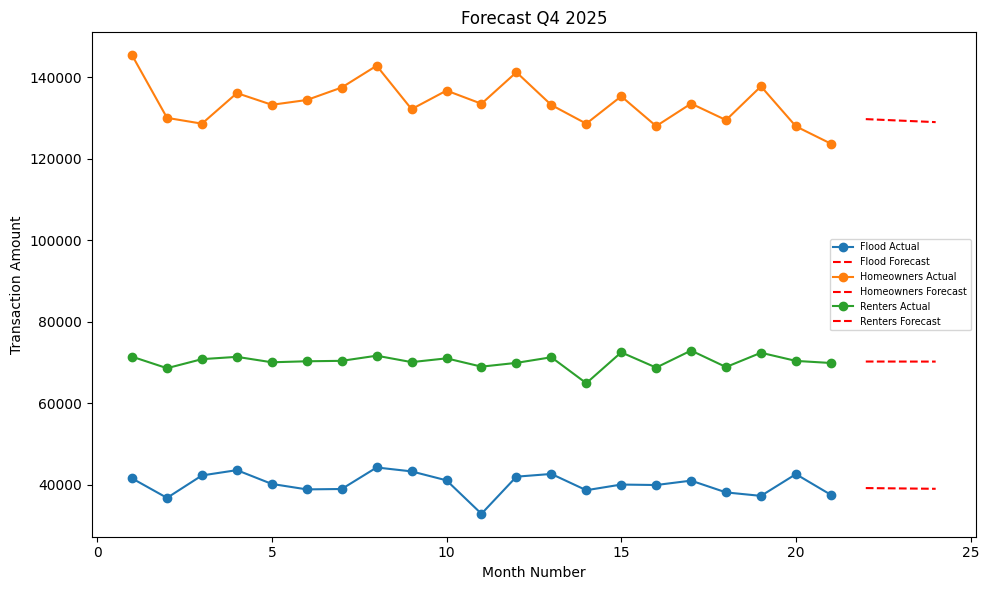

In [11]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,6))
  
for product, group in df_product.groupby('product_type'):
    plt.plot(group['month_index'], group['amount'], label=f"{product} Actual", marker='o')
    
    X_future = np.array([22, 23, 24])
    y_future = LinearRegression().fit(group['month_index'].values.reshape(-1,1), 
                                        group['amount']).predict(X_future.reshape(-1,1))
        
    plt.plot(X_future, y_future, 'r--', label=f"{product} Forecast")
  
plt.title("Forecast Q4 2025")
plt.xlabel("Month Number")
plt.ylabel("Transaction Amount")
plt.legend(fontsize='x-small')
plt.tight_layout()
plt.show()   

In [12]:
df_dummies = pd.get_dummies(df, columns=['product_type', 'region'], prefix=['product', 'region'], dtype=int)

df_dummies.head()

,transaction_id,amount,transaction_date,month_index,product_Flood,product_Homeowners,product_Renters,region_Midwest,region_Northeast,region_South,region_West
0,1,21.52,2024-01-21,1,0,0,1,0,0,0,1
1,2,12.76,2024-03-28,3,0,0,1,0,1,0,0
2,3,20.46,2024-11-04,11,0,0,1,0,1,0,0
3,4,91.27,2024-07-10,7,1,0,0,0,0,1,0
4,5,197.09,2024-09-09,9,1,0,0,0,0,1,0


In [14]:
path = "C:/Users/tokud/Projects/Insurance Linear Regression/training.csv"

df_dummies.to_csv(path, index=False)

In [15]:
df_dummies.columns

Index(['transaction_id', 'amount', 'transaction_date', 'month_index',
       'product_Flood', 'product_Homeowners', 'product_Renters',
       'region_Midwest', 'region_Northeast', 'region_South', 'region_West'],
      dtype='object')

In [16]:
features = ['month_index', 'product_Flood', 'product_Homeowners', 'product_Renters',
       'region_Midwest', 'region_Northeast', 'region_South', 'region_West']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_dummies[features]
y = df_dummies['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, "\n")
print(X_test.shape, "\n")
print(y_train.shape, "\n")
print(y_test.shape)

(80000, 8) 

(20000, 8) 

(80000,) 

(20000,)


In [18]:
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {math.sqrt(mse)}")
print(f"R-Squared Error: {(r2)*100}")

Mean Squared Error: 19.669961635557726
R-Squared Error: 91.84768517552435


In [19]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("Train R-Squared:", (train_r2)*100)
print("Test R-Squared:", (test_r2)*100)

Train R-Squared: 91.88340042727381
Test R-Squared: 91.84768517552435
